In [1]:
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import rcParams


names = [
    "eval_iter-wpe-fastmnmf-oracle_LibriMixDemandTest",
    "finetune_mask-based-wpd_doa-aware-lstm_iter-wpe-fastmnmf-doaest_LibriMixDemandVal",
    "finetune_mask-based-wpd_doa-aware-lstm_iter-wpe-fastmnmf-doaest_LibriMixDemandTest",
    "finetune_mask-based-wpd_doa-aware-lstm_iter-wpe-fastmnmf-doaest_lr1e-3_LibriMixDemandTest",
    "finetune_mask-based-wpd_doa-aware-lstm_oracle_LibriMixDemandTest",
    "finetune_mask-based-wpd_doa-aware-lstm_oracle_lr1e-3_LibriMixDemandTest"
]

datadict = {
    "mean": [],
    "y1": [],
    "y2": []
}
for name in names:
    wpd_dir = f"/n/work1/fujita/research/WPD_adaptation/experiments/{name}/"
    print(wpd_dir)
    
    dirs_none = [p for p in Path(wpd_dir).glob("**/metrics.csv") if re.search("None", str(p))]
    print("dirs_none:", dirs_none)
    dirs_eval = [p for p in Path(wpd_dir).glob("**/metrics.csv") if re.search("eval", str(p))]
    print("dirs_eval:", dirs_eval)
    dirs_finetune = [p for p in Path(wpd_dir).glob("**/metrics.csv") if not re.search("None", str(p)) and not re.search("eval", str(p))]
    print("dirs_finetune:", dirs_finetune)
    
    df = pd.DataFrame()

    for path in dirs_none:
        csv = pd.read_csv(path)
        try:
            df = pd.concat((df, pd.DataFrame({
                "SNR": [float(str(path).split("noise-snr=")[1].split("_")[0])],
                "total_s": [0],
                "id": [int(str(path).split("id=")[1].split("/")[0])],
                "WER": [csv.iloc[0]["test_WER"].item()],
                "SDR": [csv.iloc[0]["test_SDR"].item()],
                "STOI": [csv.iloc[0]["test_STOI"].item()],
                "PESQ": [csv.iloc[0]["test_PESQ"].item()],
                "SRMR": [csv.iloc[0]["test_SRMR"].item()]
            })))
        except:
            continue

    for path in dirs_eval:
        csv = pd.read_csv(path)
        try:
            df = pd.concat((df, pd.DataFrame({
                "SNR": [float(str(path).split("noise-snr=")[1].split("_")[0])],
                "id": [int(str(path).split("id=")[1].split("/")[0])],
                "WER": [csv.iloc[0]["test_WER"].item()],
                "SDR": [csv.iloc[0]["test_SDR"].item()],
                "STOI": [csv.iloc[0]["test_STOI"].item()],
                "PESQ": [csv.iloc[0]["test_PESQ"].item()],
                "SRMR": [csv.iloc[0]["test_SRMR"].item()]
            })))
        except:
            continue

    for path in dirs_finetune:
        csv = pd.read_csv(path)
        try:
            df = pd.concat((df, pd.DataFrame({
                "SNR": [float(str(path).split("noise-snr=")[1].split("_")[0])],
                "total_s": [int(str(path).split("total_s=")[1].split("_")[0])],
                "id": [int(str(path).split("id=")[1].split("/")[0])],
                "WER": [csv[csv.epoch==1]["test_WER"].item()],
                "SDR": [csv[csv.epoch==1]["test_SDR"].item()],
                "STOI": [csv[csv.epoch==1]["test_STOI"].item()],
                "PESQ": [csv[csv.epoch==1]["test_PESQ"].item()],
                "SRMR": [csv[csv.epoch==1]["test_SRMR"].item()]
            })))
        except:
            continue

    z_score = 1.96
    try:
        mean = df.groupby(["SNR", "total_s"]).mean()
        sem = df.groupby(["SNR", "total_s"]).sem()
    except:
        mean = df.groupby(["SNR"]).mean()
        sem = df.groupby(["SNR"]).sem()
    margin_of_error = z_score * sem
    y1, y2 = mean - margin_of_error, mean + margin_of_error
    mean = mean.reset_index()
    y1 = y1.reset_index()
    y2 = y2.reset_index()
    
    datadict["mean"].append(mean)
    datadict["y1"].append(y1)
    datadict["y2"].append(y2)
    

/n/work1/fujita/research/WPD_adaptation/experiments/eval_iter-wpe-fastmnmf-oracle_LibriMixDemandTest/
dirs_none: []
dirs_eval: [PosixPath('/n/work1/fujita/research/WPD_adaptation/experiments/eval_iter-wpe-fastmnmf-oracle_LibriMixDemandTest/noise-snr=0.0_id=0/lightning_logs/version_0/metrics.csv'), PosixPath('/n/work1/fujita/research/WPD_adaptation/experiments/eval_iter-wpe-fastmnmf-oracle_LibriMixDemandTest/noise-snr=30.0_id=0/lightning_logs/version_0/metrics.csv'), PosixPath('/n/work1/fujita/research/WPD_adaptation/experiments/eval_iter-wpe-fastmnmf-oracle_LibriMixDemandTest/noise-snr=-5.0_id=0/lightning_logs/version_0/metrics.csv'), PosixPath('/n/work1/fujita/research/WPD_adaptation/experiments/eval_iter-wpe-fastmnmf-oracle_LibriMixDemandTest/noise-snr=5.0_id=0/lightning_logs/version_0/metrics.csv'), PosixPath('/n/work1/fujita/research/WPD_adaptation/experiments/eval_iter-wpe-fastmnmf-oracle_LibriMixDemandTest/noise-snr=0.0_id=11/lightning_logs/version_0/metrics.csv'), PosixPath('/n/

In [2]:
def plot_finetuning_row(ax, df, y1, y2, var="SNR", domain=[30.0, 5.0, 0.0, -5.0], put_xlabel=False, put_title=False):
    x = [0, 30, 60]
    fontsize = 18
    labelsize = 16
    ax[0].plot(x, df[df[var]==domain[0]]["WER"], color=(0, 0, 1, 1), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[0].plot(x, df[df[var]==domain[1]]["WER"], color=(0, 1, 0, 1), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[0].plot(x, df[df[var]==domain[2]]["WER"], color=(1, 0, 0, 1), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[0].plot(x, df[df[var]==domain[3]]["WER"], color=(0, 0, 0, 1), marker="+", linestyle="-.", label=f"{var}={domain[3]}")
    ax[0].fill_between(x, y1[y1[var]==domain[0]]["WER"], y2[y2[var]==domain[0]]["WER"], color=(0, 0, 1, 1), alpha=0.15)
    ax[0].fill_between(x, y1[y1[var]==domain[1]]["WER"], y2[y2[var]==domain[1]]["WER"], color=(0, 1, 0, 1), alpha=0.15)
    ax[0].fill_between(x, y1[y1[var]==domain[2]]["WER"], y2[y2[var]==domain[2]]["WER"], color=(1, 0, 0, 1), alpha=0.15)
    ax[0].fill_between(x, y1[y1[var]==domain[3]]["WER"], y2[y2[var]==domain[3]]["WER"], color=(0, 0, 0, 1), alpha=0.15)
    ax[0].set_ylim(0, 1.5)
    if put_xlabel:
        ax[0].set_xlabel('Amount of finetune data [sec]', fontsize=fontsize)
    if put_title:
        ax[0].set_title(r'$\text{WER}\downarrow$', fontsize=fontsize)
    ax[0].set_xticks(x)
    ax[0].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[0].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[0].legend()
    ax[1].plot(x, df[df[var]==domain[0]]["SDR"], color=(0, 0, 1, 1), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[1].plot(x, df[df[var]==domain[1]]["SDR"], color=(0, 1, 0, 1), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[1].plot(x, df[df[var]==domain[2]]["SDR"], color=(1, 0, 0, 1), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[1].plot(x, df[df[var]==domain[3]]["SDR"], color=(0, 0, 0, 1), marker="+", linestyle="-.", label=f"{var}={domain[3]}")
    ax[1].fill_between(x, y1[y1[var]==domain[0]]["SDR"], y2[y2[var]==domain[0]]["SDR"], color=(0, 0, 1, 1), alpha=0.15)
    ax[1].fill_between(x, y1[y1[var]==domain[1]]["SDR"], y2[y2[var]==domain[1]]["SDR"], color=(0, 1, 0, 1), alpha=0.15)
    ax[1].fill_between(x, y1[y1[var]==domain[2]]["SDR"], y2[y2[var]==domain[2]]["SDR"], color=(1, 0, 0, 1), alpha=0.15)
    ax[1].fill_between(x, y1[y1[var]==domain[3]]["SDR"], y2[y2[var]==domain[3]]["SDR"], color=(0, 0, 0, 1), alpha=0.15)
    ax[1].set_ylim(-2, 14)
    if put_xlabel:
        ax[1].set_xlabel('Amount of fine-tune data [sec]', fontsize=fontsize)
    if put_title:
        ax[1].set_title(r'$\text{SDR}\uparrow$', fontsize=fontsize)
    ax[1].set_xticks(x)
    ax[1].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[1].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[1].legend()
    ax[2].plot(x, df[df[var]==domain[0]]["STOI"], color=(0, 0, 1, 1), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[2].plot(x, df[df[var]==domain[1]]["STOI"], color=(0, 1, 0, 1), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[2].plot(x, df[df[var]==domain[2]]["STOI"], color=(1, 0, 0, 1), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[2].plot(x, df[df[var]==domain[3]]["STOI"], color=(0, 0, 0, 1), marker="+", linestyle="-.", label=f"{var}={domain[3]}")
    ax[2].fill_between(x, y1[y1[var]==domain[0]]["STOI"], y2[y2[var]==domain[0]]["STOI"], color=(0, 0, 1, 1), alpha=0.15)
    ax[2].fill_between(x, y1[y1[var]==domain[1]]["STOI"], y2[y2[var]==domain[1]]["STOI"], color=(0, 1, 0, 1), alpha=0.15)
    ax[2].fill_between(x, y1[y1[var]==domain[2]]["STOI"], y2[y2[var]==domain[2]]["STOI"], color=(1, 0, 0, 1), alpha=0.15)
    ax[2].fill_between(x, y1[y1[var]==domain[3]]["STOI"], y2[y2[var]==domain[3]]["STOI"], color=(0, 0, 0, 1), alpha=0.15)
    ax[2].set_ylim(0.5, 1)
    if put_xlabel:
        ax[2].set_xlabel('Amount of fine-tune data [sec]', fontsize=fontsize)
    if put_title:
        ax[2].set_title(r'$\text{STOI}\uparrow$', fontsize=fontsize)
    ax[2].set_xticks(x)
    ax[2].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[2].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[2].legend()
    ax[3].plot(x, df[df[var]==domain[0]]["PESQ"], color=(0, 0, 1, 1), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[3].plot(x, df[df[var]==domain[1]]["PESQ"], color=(0, 1, 0, 1), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[3].plot(x, df[df[var]==domain[2]]["PESQ"], color=(1, 0, 0, 1), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[3].plot(x, df[df[var]==domain[3]]["PESQ"], color=(0, 0, 0, 1), marker="+", linestyle="-.", label=f"{var}={domain[3]}")
    ax[3].fill_between(x, y1[y1[var]==domain[0]]["PESQ"], y2[y2[var]==domain[0]]["PESQ"], color=(0, 0, 1, 1), alpha=0.15)
    ax[3].fill_between(x, y1[y1[var]==domain[1]]["PESQ"], y2[y2[var]==domain[1]]["PESQ"], color=(0, 1, 0, 1), alpha=0.15)
    ax[3].fill_between(x, y1[y1[var]==domain[2]]["PESQ"], y2[y2[var]==domain[2]]["PESQ"], color=(1, 0, 0, 1), alpha=0.15)
    ax[3].fill_between(x, y1[y1[var]==domain[3]]["PESQ"], y2[y2[var]==domain[3]]["PESQ"], color=(0, 0, 0, 1), alpha=0.15)
    ax[3].set_ylim(1.0, 2.8)
    if put_xlabel:
        ax[3].set_xlabel('Amount of fine-tune data [sec]', fontsize=fontsize)
    if put_title:
        ax[3].set_title(r'$\text{PESQ}\uparrow$', fontsize=fontsize)
    ax[3].set_xticks(x)
    ax[3].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[3].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[3].legend()
    ax[4].plot(x, df[df[var]==domain[0]]["SRMR"], color=(0, 0, 1, 1), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[4].plot(x, df[df[var]==domain[1]]["SRMR"], color=(0, 1, 0, 1), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[4].plot(x, df[df[var]==domain[2]]["SRMR"], color=(1, 0, 0, 1), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[4].plot(x, df[df[var]==domain[3]]["SRMR"], color=(0, 0, 0, 1), marker="+", linestyle="-.", label=f"{var}={domain[3]}")
    ax[4].fill_between(x, y1[y1[var]==domain[0]]["SRMR"], y2[y2[var]==domain[0]]["SRMR"], color=(0, 0, 1, 1), alpha=0.15)
    ax[4].fill_between(x, y1[y1[var]==domain[1]]["SRMR"], y2[y2[var]==domain[1]]["SRMR"], color=(0, 1, 0, 1), alpha=0.15)
    ax[4].fill_between(x, y1[y1[var]==domain[2]]["SRMR"], y2[y2[var]==domain[2]]["SRMR"], color=(1, 0, 0, 1), alpha=0.15)
    ax[4].fill_between(x, y1[y1[var]==domain[3]]["SRMR"], y2[y2[var]==domain[3]]["SRMR"], color=(0, 0, 0, 1), alpha=0.15)
    ax[4].set_ylim(3.5, 12)
    if put_xlabel: 
        ax[4].set_xlabel('Amount of fine-tune data [sec]', fontsize=fontsize)
    if put_title:
        ax[4].set_title(r'$\text{SRMR}\uparrow$', fontsize=fontsize)
    ax[4].set_xticks(x)
    ax[4].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[4].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[4].legend()

In [3]:
def plot_evaluation_row(ax, df, y1, y2, var="SNR", domain=[30.0, 5.0, 0.0, -5.0], put_xlabel=False, put_title=False):
    fontsize = 18
    labelsize = 16
    ax[0].axhline(df[df[var]==domain[0]]["WER"].item(), color=(0, 0, 1, 1), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[0].axhline(df[df[var]==domain[1]]["WER"].item(), color=(0, 1, 0, 1), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[0].axhline(df[df[var]==domain[2]]["WER"].item(), color=(1, 0, 0, 1), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[0].axhline(df[df[var]==domain[3]]["WER"].item(), color=(0, 0, 0, 1), marker="+", linestyle="-.", label=f"{var}={domain[3]}")
    ax[0].axhspan(y1[y1[var]==domain[0]]["WER"].item(), y2[y2[var]==domain[0]]["WER"].item(), color=(0, 0, 1, 1), alpha=0.15)
    ax[0].axhspan(y1[y1[var]==domain[1]]["WER"].item(), y2[y2[var]==domain[1]]["WER"].item(), color=(0, 1, 0, 1), alpha=0.15)
    ax[0].axhspan(y1[y1[var]==domain[2]]["WER"].item(), y2[y2[var]==domain[2]]["WER"].item(), color=(1, 0, 0, 1), alpha=0.15)
    ax[0].axhspan(y1[y1[var]==domain[3]]["WER"].item(), y2[y2[var]==domain[3]]["WER"].item(), color=(0, 0, 0, 1), alpha=0.15)
    ax[0].set_ylim(0, 2.5)
    if put_xlabel:
        ax[0].set_xlabel('Amount of finetune data [sec]', fontsize=fontsize)
    if put_title:
        ax[0].set_title(r'$\text{WER}\downarrow$', fontsize=fontsize)
    ax[0].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[0].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[0].legend()
    ax[1].axhline(df[df[var]==domain[0]]["SDR"].item(), color=(0, 0, 1, 1), linestyle="-", label=f"{var}={domain[0]}")
    ax[1].axhline(df[df[var]==domain[1]]["SDR"].item(), color=(0, 1, 0, 1), linestyle="--", label=f"{var}={domain[1]}")
    ax[1].axhline(df[df[var]==domain[2]]["SDR"].item(), color=(1, 0, 0, 1), linestyle=":", label=f"{var}={domain[2]}")
    ax[1].axhline(df[df[var]==domain[3]]["SDR"].item(), color=(0, 0, 0, 1), linestyle="-.", label=f"{var}={domain[3]}")
    ax[1].axhspan(y1[y1[var]==domain[0]]["SDR"].item(), y2[y2[var]==domain[0]]["SDR"].item(), color=(0, 0, 1, 1), alpha=0.15)
    ax[1].axhspan(y1[y1[var]==domain[1]]["SDR"].item(), y2[y2[var]==domain[1]]["SDR"].item(), color=(0, 1, 0, 1), alpha=0.15)
    ax[1].axhspan(y1[y1[var]==domain[2]]["SDR"].item(), y2[y2[var]==domain[2]]["SDR"].item(), color=(1, 0, 0, 1), alpha=0.15)
    ax[1].axhspan(y1[y1[var]==domain[3]]["SDR"].item(), y2[y2[var]==domain[3]]["SDR"].item(), color=(0, 0, 0, 1), alpha=0.15)
    ax[1].set_ylim(-2, 14)
    if put_xlabel:
        ax[1].set_xlabel('Amount of fine-tune data [sec]', fontsize=fontsize)
    if put_title:
        ax[1].set_title(r'$\text{SDR}\uparrow$', fontsize=fontsize)
    ax[1].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[1].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[1].legend()
    ax[2].axhline(df[df[var]==domain[0]]["STOI"].item(), color=(0, 0, 1, 1), linestyle="-", label=f"{var}={domain[0]}")
    ax[2].axhline(df[df[var]==domain[1]]["STOI"].item(), color=(0, 1, 0, 1), linestyle="--", label=f"{var}={domain[1]}")
    ax[2].axhline(df[df[var]==domain[2]]["STOI"].item(), color=(1, 0, 0, 1), linestyle=":", label=f"{var}={domain[2]}")
    ax[2].axhline(df[df[var]==domain[3]]["STOI"].item(), color=(0, 0, 0, 1), linestyle="-.", label=f"{var}={domain[3]}")
    ax[2].axhspan(y1[y1[var]==domain[0]]["STOI"].item(), y2[y2[var]==domain[0]]["STOI"].item(), color=(0, 0, 1, 1), alpha=0.15)
    ax[2].axhspan(y1[y1[var]==domain[1]]["STOI"].item(), y2[y2[var]==domain[1]]["STOI"].item(), color=(0, 1, 0, 1), alpha=0.15)
    ax[2].axhspan(y1[y1[var]==domain[2]]["STOI"].item(), y2[y2[var]==domain[2]]["STOI"].item(), color=(1, 0, 0, 1), alpha=0.15)
    ax[2].axhspan(y1[y1[var]==domain[3]]["STOI"].item(), y2[y2[var]==domain[3]]["STOI"].item(), color=(0, 0, 0, 1), alpha=0.15)
    ax[2].set_ylim(0.55, 0.95)
    if put_xlabel:
        ax[2].set_xlabel('Amount of fine-tune data [sec]', fontsize=fontsize)
    if put_title:
        ax[2].set_title(r'$\text{STOI}\uparrow$', fontsize=fontsize)
    ax[2].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[2].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[2].legend()
    ax[3].axhline(df[df[var]==domain[0]]["PESQ"].item(), color=(0, 0, 1, 1), linestyle="-", label=f"{var}={domain[0]}")
    ax[3].axhline(df[df[var]==domain[1]]["PESQ"].item(), color=(0, 1, 0, 1), linestyle="--", label=f"{var}={domain[1]}")
    ax[3].axhline(df[df[var]==domain[2]]["PESQ"].item(), color=(1, 0, 0, 1), linestyle=":", label=f"{var}={domain[2]}")
    ax[3].axhline(df[df[var]==domain[3]]["PESQ"].item(), color=(0, 0, 0, 1), linestyle="-.", label=f"{var}={domain[3]}")
    ax[3].axhspan(y1[y1[var]==domain[0]]["PESQ"].item(), y2[y2[var]==domain[0]]["PESQ"].item(), color=(0, 0, 1, 1), alpha=0.15)
    ax[3].axhspan(y1[y1[var]==domain[1]]["PESQ"].item(), y2[y2[var]==domain[1]]["PESQ"].item(), color=(0, 1, 0, 1), alpha=0.15)
    ax[3].axhspan(y1[y1[var]==domain[2]]["PESQ"].item(), y2[y2[var]==domain[2]]["PESQ"].item(), color=(1, 0, 0, 1), alpha=0.15)
    ax[3].axhspan(y1[y1[var]==domain[3]]["PESQ"].item(), y2[y2[var]==domain[3]]["PESQ"].item(), color=(0, 0, 0, 1), alpha=0.15)
    ax[3].set_ylim(1, 2.5)
    if put_xlabel:
        ax[3].set_xlabel('Amount of fine-tune data [sec]', fontsize=fontsize)
    if put_title:
        ax[3].set_title(r'$\text{PESQ}\uparrow$', fontsize=fontsize)
    ax[3].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[3].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[3].legend()
    ax[4].axhline(df[df[var]==domain[0]]["SRMR"].item(), color=(0, 0, 1, 1), linestyle="-", label=f"{var}={domain[0]}")
    ax[4].axhline(df[df[var]==domain[1]]["SRMR"].item(), color=(0, 1, 0, 1), linestyle="--", label=f"{var}={domain[1]}")
    ax[4].axhline(df[df[var]==domain[2]]["SRMR"].item(), color=(1, 0, 0, 1), linestyle=":", label=f"{var}={domain[2]}")
    ax[4].axhline(df[df[var]==domain[3]]["SRMR"].item(), color=(0, 0, 0, 1), linestyle="-.", label=f"{var}={domain[3]}")
    ax[4].axhspan(y1[y1[var]==domain[0]]["SRMR"].item(), y2[y2[var]==domain[0]]["SRMR"].item(), color=(0, 0, 1, 1), alpha=0.15)
    ax[4].axhspan(y1[y1[var]==domain[1]]["SRMR"].item(), y2[y2[var]==domain[1]]["SRMR"].item(), color=(0, 1, 0, 1), alpha=0.15)
    ax[4].axhspan(y1[y1[var]==domain[2]]["SRMR"].item(), y2[y2[var]==domain[2]]["SRMR"].item(), color=(1, 0, 0, 1), alpha=0.15)
    ax[4].axhspan(y1[y1[var]==domain[3]]["SRMR"].item(), y2[y2[var]==domain[3]]["SRMR"].item(), color=(0, 0, 0, 1), alpha=0.15)
    ax[4].set_ylim(3.5, 8)
    if put_xlabel: 
        ax[4].set_xlabel('Amount of fine-tune data [sec]', fontsize=fontsize)
    if put_title:
        ax[4].set_title(r'$\text{SRMR}\uparrow$', fontsize=fontsize)
    ax[4].tick_params(axis='both', which='major', labelsize=labelsize)
    ax[4].tick_params(axis='both', which='minor', labelsize=labelsize)
    ax[4].legend()

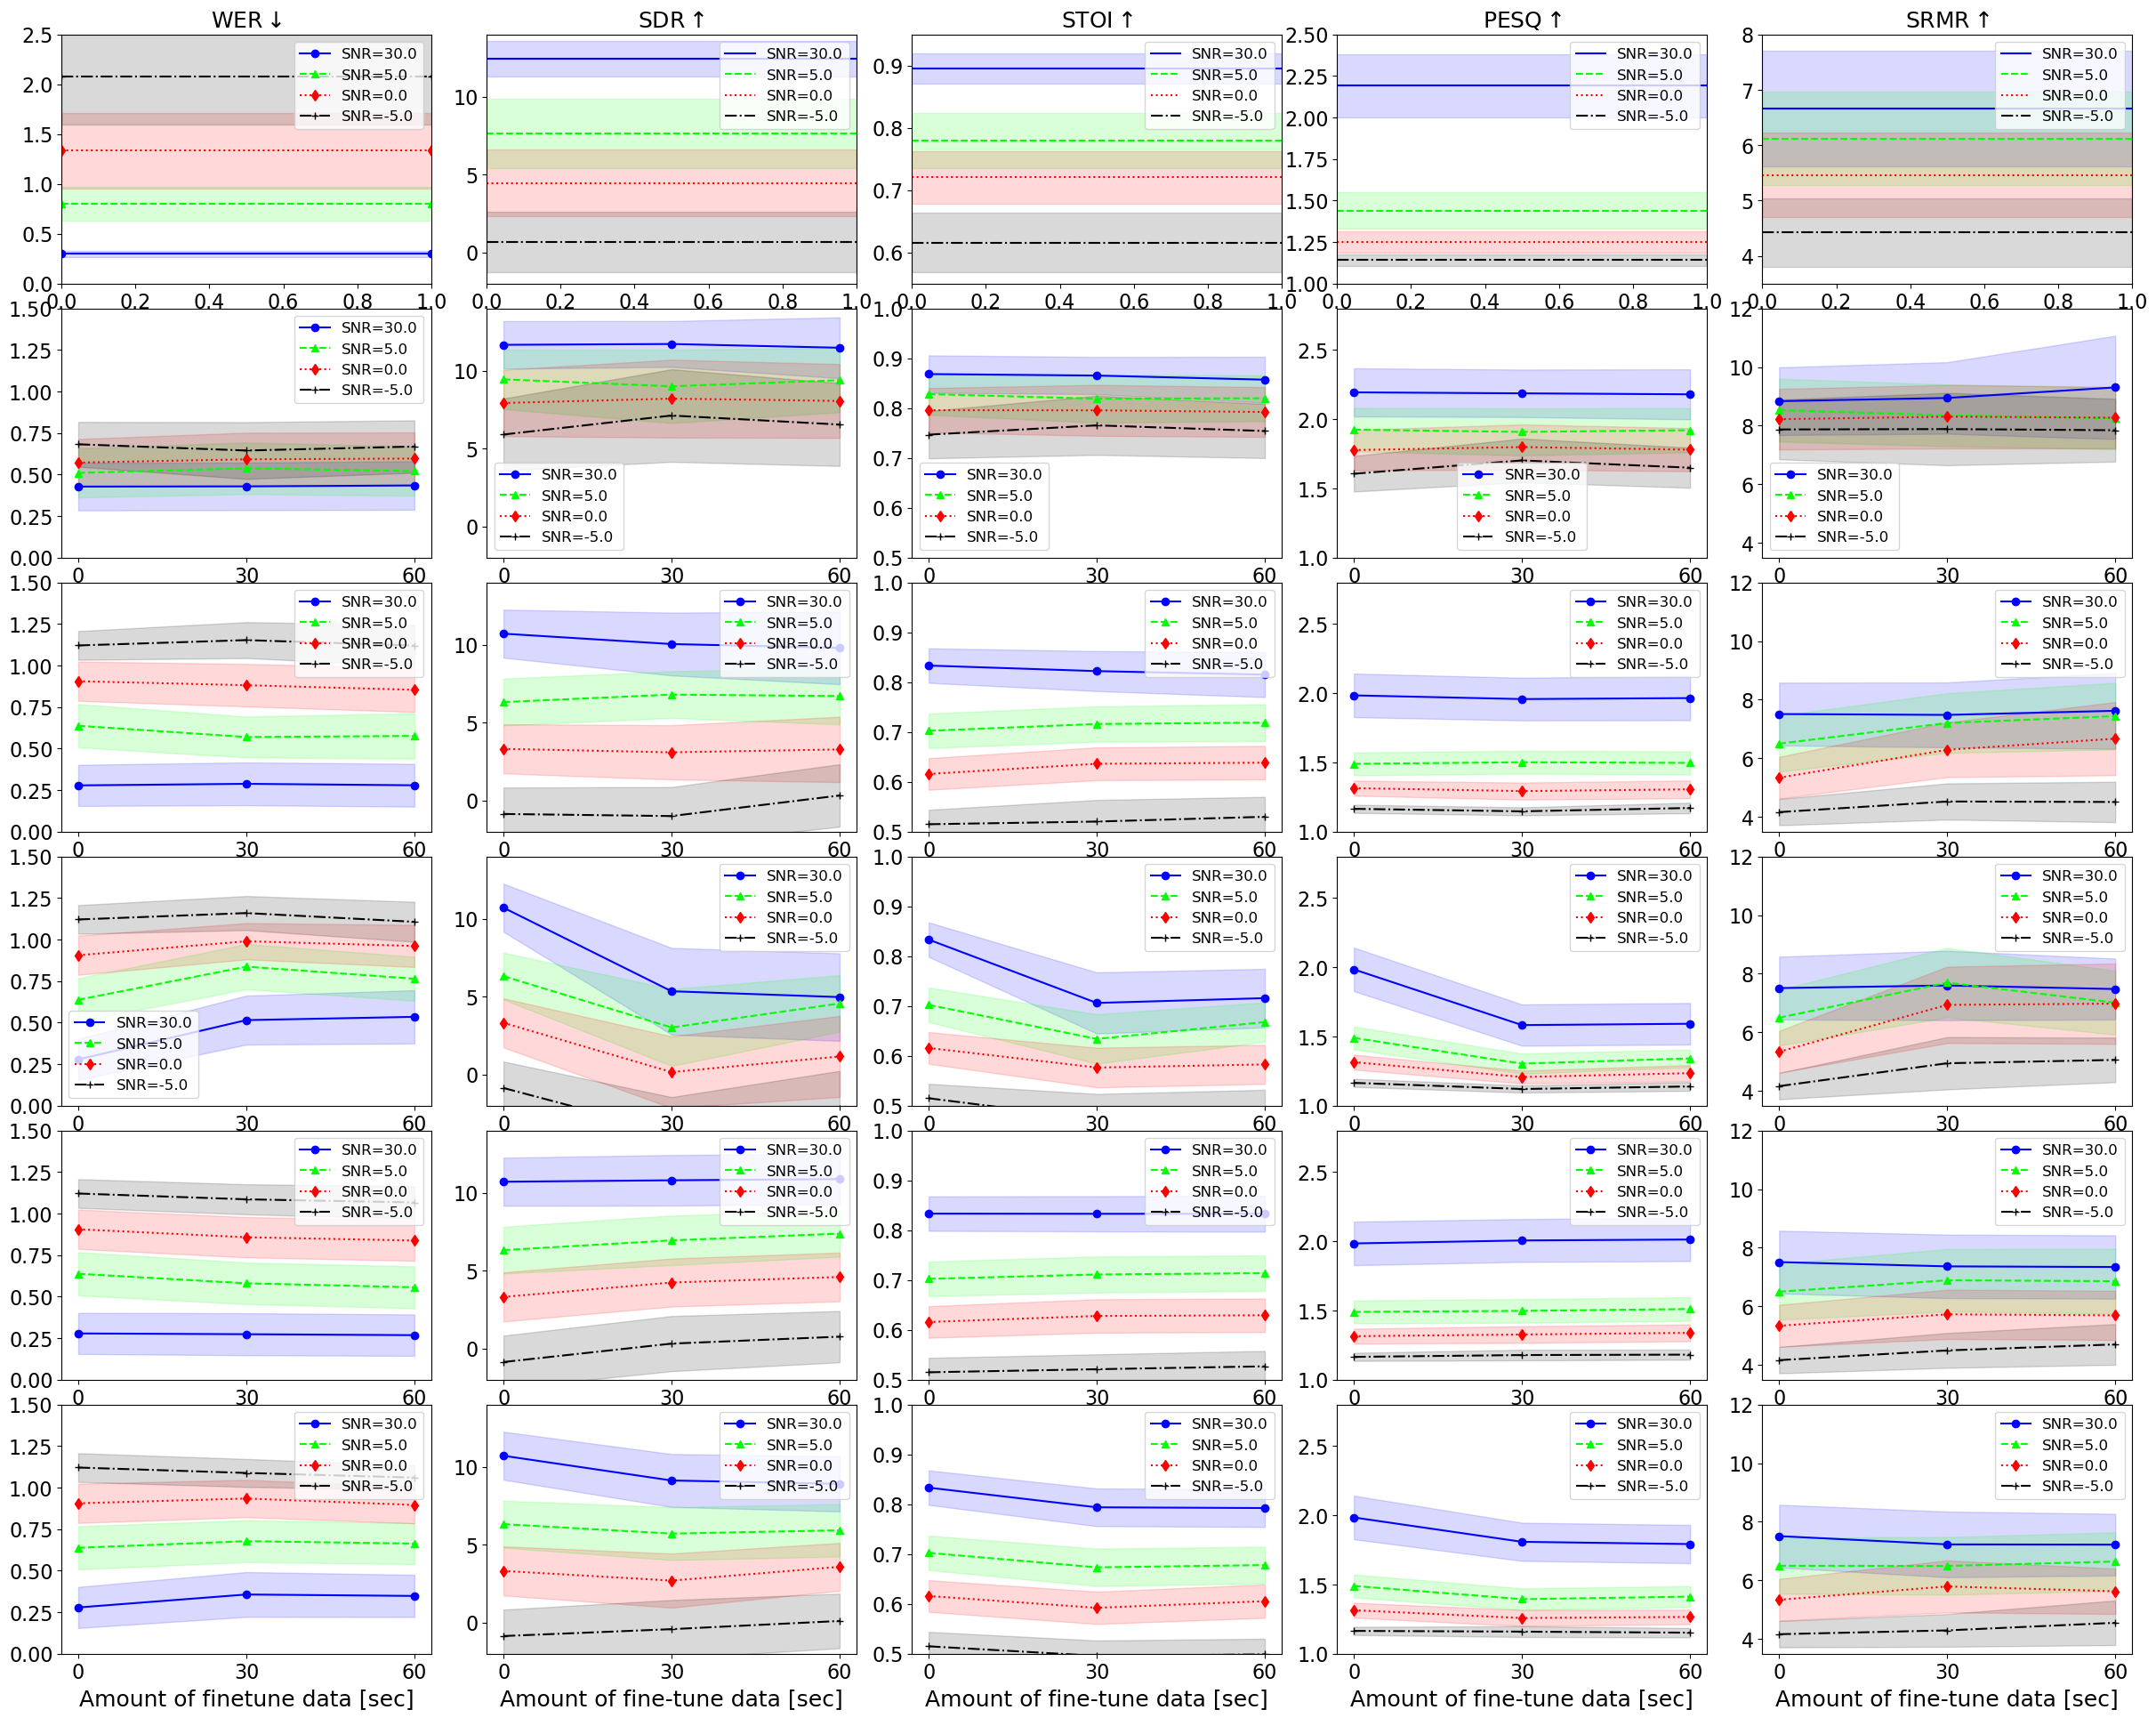

In [9]:
fig, ax = plt.subplots(6, 5, figsize=(24, 20))
plt.rcParams.update({'font.size': 12})

plot_evaluation_row(ax[0], datadict["mean"][0], datadict["y1"][0], datadict["y2"][0], put_xlabel=False, put_title=True)
fig.subplots_adjust(left=0.02, right=0.99, top=0.97, bottom=0.06, hspace=0.1, wspace=0.15)
plot_finetuning_row(ax[1], datadict["mean"][1], datadict["y1"][1], datadict["y2"][1], put_xlabel=False, put_title=False)
fig.subplots_adjust(left=0.02, right=0.99, top=0.97, bottom=0.06, hspace=0.1, wspace=0.15)
plot_finetuning_row(ax[2], datadict["mean"][2], datadict["y1"][2], datadict["y2"][2], put_xlabel=False, put_title=False)
fig.subplots_adjust(left=0.02, right=0.99, top=0.97, bottom=0.06, hspace=0.1, wspace=0.15)
plot_finetuning_row(ax[3], datadict["mean"][3], datadict["y1"][3], datadict["y2"][3], put_xlabel=False, put_title=False)
fig.subplots_adjust(left=0.02, right=0.99, top=0.97, bottom=0.06, hspace=0.1, wspace=0.15)
plot_finetuning_row(ax[4], datadict["mean"][4], datadict["y1"][4], datadict["y2"][4], put_xlabel=False, put_title=False)
fig.subplots_adjust(left=0.02, right=0.99, top=0.97, bottom=0.06, hspace=0.1, wspace=0.15)
plot_finetuning_row(ax[5], datadict["mean"][5], datadict["y1"][5], datadict["y2"][5], put_xlabel=True, put_title=False)
fig.subplots_adjust(left=0.02, right=0.99, top=0.97, bottom=0.06, hspace=0.1, wspace=0.15)